In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read dataset
car_price_df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
car_price_df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# checking the row and column count
car_price_df.shape

(205, 26)

In [5]:
# basic info dataset
car_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### No column has missing values

In [6]:
# checking the mean, SD, quartiles
car_price_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
# Drop car_ID as it is not reqiured
car_price_df.drop('car_ID', axis=1, inplace=True)

In [8]:
# Get all numerical columns
num_columns = list(filter(lambda x : x not in ['symboling'] and car_price_df[x].dtype in ['float64', 'int64'], car_price_df.columns))

In [9]:
# check total number of numerical columns
len(num_columns)

14

### Checking outliers

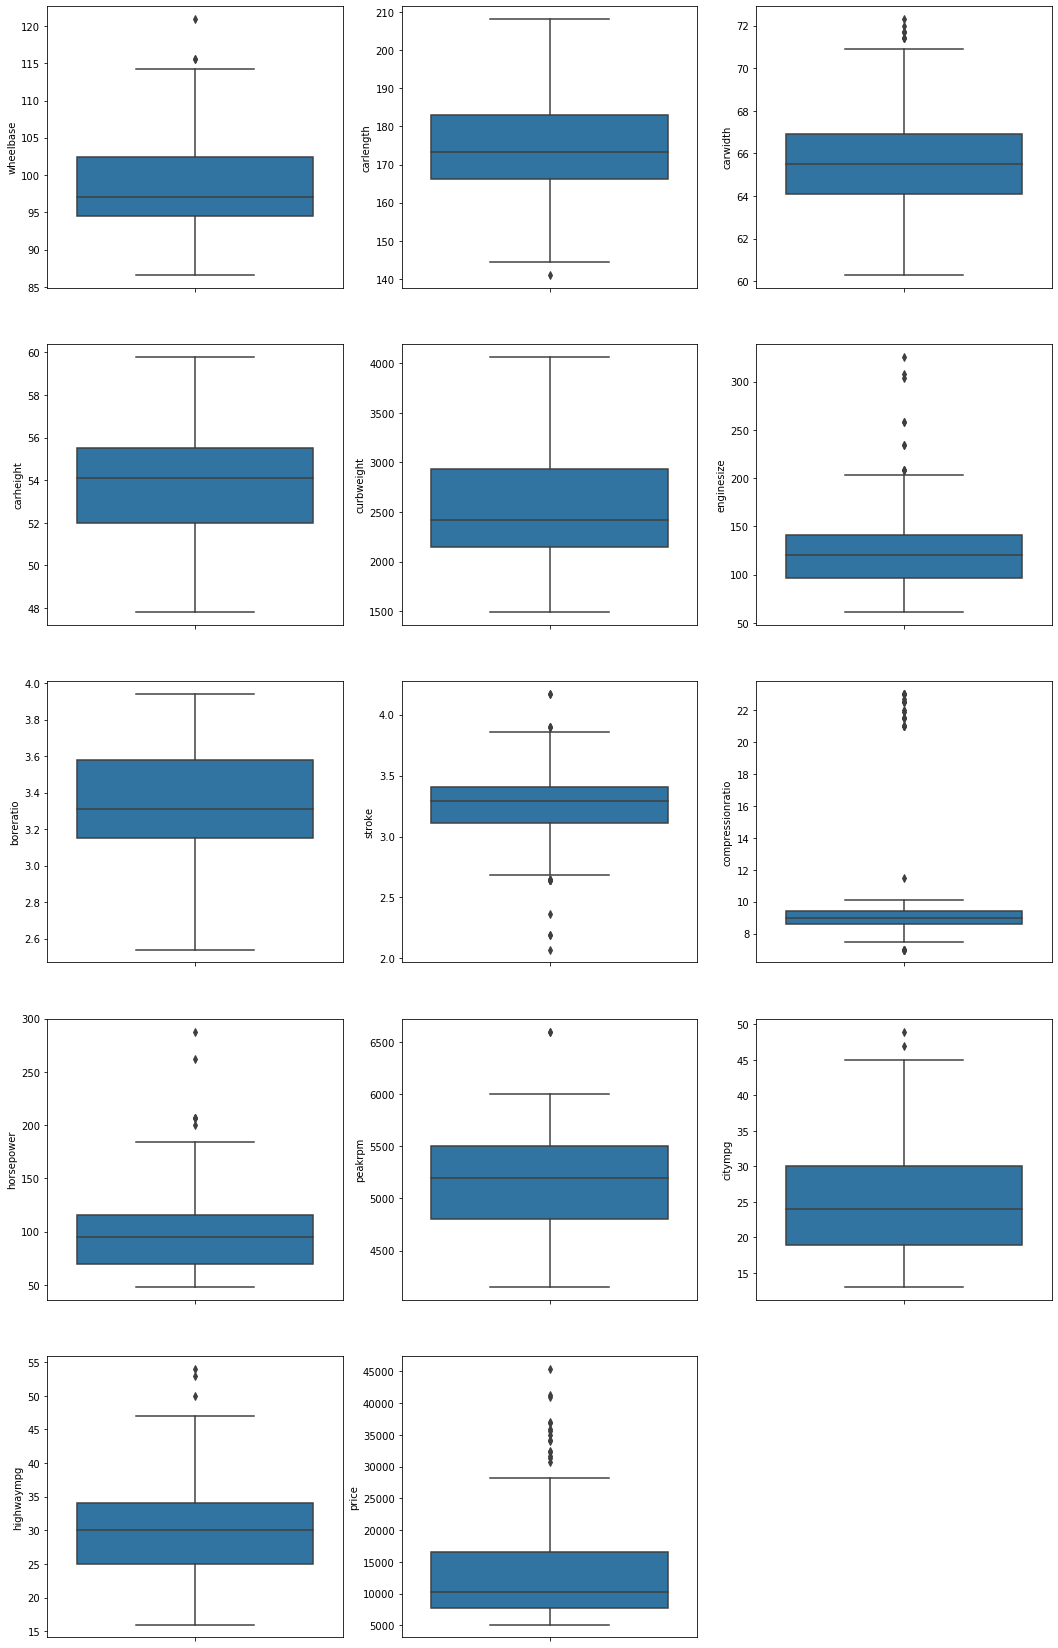

In [10]:
# box plot of all the numerical columns
plt.figure(figsize=(18,30))
for i,col in enumerate(num_columns):
    plt.subplot(5,3,i+1)
    sns.boxplot(y = car_price_df[col])
    
plt.show()

#### Drive Car Company and Model from CarName

In [11]:
carname = car_price_df['CarName'].str.split(' ', n = 1, expand = True)
company = carname[0]

# Drop CarName
car_price_df.drop('CarName', axis = 1, inplace = True)
car_price_df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Analyzing Car Company

In [12]:
company.value_counts().sort_index()

Nissan          1
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         17
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
Name: 0, dtype: int64

<strong>Here you can see there are some issue in data.There are few companies present with the different spellings the data.</strong>
So Let's fix those

<table>
    <tr>
        <td>List of companies</td>
        <td>Final Name</td>
    </tr>
    <tr>
        <td>maxda, mazda</td>
        <td>mazda</td>
    <tr>
        <td>Nissan, nissan</td>
        <td>nissan</td>
    </tr>
    <tr>
        <td>porcshce, porsche</td>
        <td>porsche</td>
    </tr>
    <tr>
        <td>toyota, toyouta</td>
        <td>toyota</td>
    </tr>
    <tr>
        <td>vokswagen, volkswagen, vw</td>
        <td>volkswagen</td>
    </tr>
</table>  

In [13]:
# fixing the spelling mistakes.
company.replace(to_replace={'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche', 
                            'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'}, inplace = True)
company.value_counts().sort_index()

alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
mazda          17
mercury         1
mitsubishi     13
nissan         18
peugeot        11
plymouth        7
porsche         5
renault         2
saab            6
subaru         12
toyota         32
volkswagen     12
volvo          11
Name: 0, dtype: int64

In [14]:
car_price_df['Company'] = company
car_price_df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


### Dummy Variables


In [15]:
# list of categorical columns
cat_columns = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',
              'cylindernumber', 'fuelsystem', 'Company']

In [16]:
# creating dummy variables of all he categorical variables
for col in cat_columns:
    category = pd.get_dummies(car_price_df[col], drop_first = True)
    category.rename(mapper = lambda x: f'{col}_{x}', axis = 1, inplace = True)
    car_price_df = pd.concat([car_price_df, category], axis = 1)
    car_price_df.drop(col, axis = 1, inplace = True)
    
car_price_df.head(5)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,0


## Splitting the data into Training and Test data set

In [17]:
# import required library
from sklearn.model_selection import train_test_split

In [18]:
# splitting the training and test data to 70% and 30% correspodingly
df_train, df_test = train_test_split(car_price_df, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescalling the features

In [19]:
# import MinMaxScaler and create it's object
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
# fit and transform the training data set
df_train.loc[:,num_columns] = scaler.fit_transform(df_train.loc[:,num_columns])
df_train

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,...,0,0,1,0,0,0,0,0,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,...,0,0,0,1,0,0,0,0,0,0
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,...,0,0,0,0,0,0,0,1,0,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,...,0,0,0,0,0,0,0,0,0,0
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.334483,0.508943,0.425000,0.336283,0.354926,0.184906,0.388889,0.641414,0.03125,0.283333,...,0,0,0,0,0,0,0,0,0,0
103,0.475862,0.707317,0.516667,0.646018,0.609775,0.452830,0.595238,0.545455,0.12500,0.433333,...,1,0,0,0,0,0,0,0,0,0
67,0.806897,0.809756,0.833333,0.769912,0.786268,0.460377,0.714286,0.732323,0.90625,0.312500,...,0,0,0,0,0,0,0,0,0,0
24,0.244828,0.263415,0.291667,0.247788,0.185803,0.109434,0.230159,0.525253,0.15000,0.083333,...,0,0,0,0,0,0,0,0,0,0


In [21]:
corr = df_train.corr()
plt.figure(figsize=(200,300))
sns.heatmap(corr, annot = True)
plt.show()
print(corr)

                    wheelbase  carlength  carwidth  carheight  curbweight  \
wheelbase            1.000000   0.877909  0.796888   0.555524    0.792815   
carlength            0.877909   1.000000  0.846307   0.454721    0.881495   
carwidth             0.796888   0.846307  1.000000   0.245022    0.873884   
carheight            0.555524   0.454721  0.245022   1.000000    0.272388   
curbweight           0.792815   0.881495  0.873884   0.272388    1.000000   
...                       ...        ...       ...        ...         ...   
Company_saab         0.014215   0.153722  0.043796   0.153810    0.057941   
Company_subaru      -0.101395  -0.080658 -0.102745   0.002497   -0.115061   
Company_toyota      -0.004621  -0.040208 -0.136127   0.101964   -0.041279   
Company_volkswagen  -0.026522  -0.005208 -0.014381   0.118105   -0.064348   
Company_volvo        0.288038   0.256437  0.209624   0.217012    0.196516   

                    enginesize  boreratio    stroke  compressionratio  \
wh

## Dividing into X and y set for model building

In [22]:
# split into y training a X training
y_train = df_train.pop('price')
X_train = df_train

## Building Model

### RFE

In [23]:
# Import libraries for RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [24]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# Let's start with 12 features
rfe = RFE(lm, 12)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('wheelbase', False, 11),
 ('carlength', False, 17),
 ('carwidth', True, 1),
 ('carheight', False, 13),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 22),
 ('horsepower', False, 6),
 ('peakrpm', False, 8),
 ('citympg', False, 32),
 ('highwaympg', False, 23),
 ('symboling_-1', False, 34),
 ('symboling_0', False, 44),
 ('symboling_1', False, 46),
 ('symboling_2', False, 45),
 ('symboling_3', False, 47),
 ('fueltype_gas', False, 26),
 ('aspiration_turbo', False, 10),
 ('doornumber_two', False, 49),
 ('carbody_hardtop', False, 28),
 ('carbody_hatchback', False, 27),
 ('carbody_sedan', False, 29),
 ('carbody_wagon', False, 30),
 ('drivewheel_fwd', False, 54),
 ('drivewheel_rwd', False, 36),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 9),
 ('enginetype_l', False, 5),
 ('enginetype_ohc', False, 51),
 ('enginetype_ohcf', False, 19),
 ('enginetype_ohcv', False, 43),
 ('enginetype_rotor', True,

In [25]:
# Columns selected through RFE

col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'enginelocation_rear', 'enginetype_rotor', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'Company_bmw',
       'Company_porsche'],
      dtype='object')

## Building model using statsmodel

In [26]:
#import statsmodels library
import statsmodels.api as sm

In [27]:
# function to build model on the provided columns
def build_model(columns):
    X_train_temp = X_train[columns]
    X_train_temp = sm.add_constant(X_train_temp)
    lm = sm.OLS(y_train, X_train_temp).fit()
    print(lm.summary())
    return X_train_temp, lm

## Model-1

In [28]:
# buildinf model-1
X_train_new, lm = build_model(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     130.2
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           6.86e-65
Time:                        20:17:42   Log-Likelihood:                 194.22
No. Observations:                 143   AIC:                            -364.4
Df Residuals:                     131   BIC:                            -328.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.10

Here R-quared is very high , it may case of **overfitting**

### Checking VIF

In [29]:
# import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
# function to calculate the VIF
def calc_vif():
    vif = pd.DataFrame()
    vif['Features'] = X_train_new.columns
    vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    print(vif)

In [31]:
# calculate VIF for Model-1
calc_vif()

                 Features    VIF
7        enginetype_rotor    inf
10     cylindernumber_two    inf
0                   const  27.65
2              curbweight   9.36
3              enginesize   8.24
1                carwidth   4.99
4               boreratio   2.21
12        Company_porsche   1.83
9   cylindernumber_twelve   1.76
6     enginelocation_rear   1.67
5                  stroke   1.51
11            Company_bmw   1.17
8    cylindernumber_three   1.05


Here you can see, enginetype_rotor has low p-value but VIF is infinite so, lets remove that from Features

### Model - 2

In [32]:
# Droping enginetype_rotor
col = col.drop('enginetype_rotor')
X_train_new, lm = build_model(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     130.2
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           6.86e-65
Time:                        20:17:43   Log-Likelihood:                 194.22
No. Observations:                 143   AIC:                            -364.4
Df Residuals:                     131   BIC:                            -328.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.10

**Even though we dropped enginetype_rotor but R-squared is almost same.
Lets check VIF again**

In [33]:
calc_vif()

                 Features    VIF
0                   const  27.65
2              curbweight   9.36
3              enginesize   8.24
1                carwidth   4.99
4               boreratio   2.21
11        Company_porsche   1.83
8   cylindernumber_twelve   1.76
6     enginelocation_rear   1.67
5                  stroke   1.51
9      cylindernumber_two   1.28
10            Company_bmw   1.17
7    cylindernumber_three   1.05


curbweight also has high VIF and even though p-value is low but as other features have even lower p-value. So let's drop curbweight

### Model-3 

In [34]:
# Drop curbweight
col = col.drop('curbweight')
X_train_new, lm = build_model(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     130.6
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.19e-63
Time:                        20:17:43   Log-Likelihood:                 187.71
No. Observations:                 143   AIC:                            -353.4
Df Residuals:                     132   BIC:                            -320.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.11

**Again there is not much affect on R-squared value which is good**

In [35]:
calc_vif()

                 Features    VIF
0                   const  27.44
2              enginesize   4.87
1                carwidth   3.29
3               boreratio   2.13
5     enginelocation_rear   1.67
10        Company_porsche   1.67
7   cylindernumber_twelve   1.63
4                  stroke   1.50
8      cylindernumber_two   1.21
9             Company_bmw   1.17
6    cylindernumber_three   1.05


**If you see 'Company_porsche' it has low VIF but p-value is high as compared to others , So let's drop that and check the results**

### Model-4

In [36]:
# Droping Company_porsche
col = col.drop('Company_porsche')
X_train_new, lm = build_model(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     142.2
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           9.26e-64
Time:                        20:17:43   Log-Likelihood:                 185.92
No. Observations:                 143   AIC:                            -351.8
Df Residuals:                     133   BIC:                            -322.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.11

**Here also there is not much affect on R-squared, which is good**

In [37]:
calc_vif()

                Features    VIF
0                  const  27.02
2             enginesize   4.86
1               carwidth   3.25
3              boreratio   2.07
7  cylindernumber_twelve   1.63
4                 stroke   1.49
8     cylindernumber_two   1.20
9            Company_bmw   1.16
5    enginelocation_rear   1.15
6   cylindernumber_three   1.05


**Let's Drop cylindernumber_twelve (because of high p-value) and check the model**

### Model - 5

In [38]:
# Dropping cylindernumber_twelve
col = col.drop('cylindernumber_twelve')
X_train_new, lm = build_model(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.6
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.94e-63
Time:                        20:17:43   Log-Likelihood:                 182.36
No. Observations:                 143   AIC:                            -346.7
Df Residuals:                     134   BIC:                            -320.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1437 

**Here also there is not much affect on R-squared, which is good**

In [39]:
calc_vif()

               Features    VIF
0                 const  24.40
2            enginesize   3.24
1              carwidth   3.11
3             boreratio   1.90
4                stroke   1.28
7    cylindernumber_two   1.14
5   enginelocation_rear   1.12
8           Company_bmw   1.10
6  cylindernumber_three   1.05


**Let's Drop stroke because of high p-value**

### Model - 6

In [40]:
# Dropping stroke
col = col.drop('stroke')
X_train_new, lm = build_model(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     170.3
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           9.11e-64
Time:                        20:17:44   Log-Likelihood:                 180.38
No. Observations:                 143   AIC:                            -344.8
Df Residuals:                     135   BIC:                            -321.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1872 

**R-squared is still in good range**

In [41]:
calc_vif()

               Features   VIF
0                 const  9.73
2            enginesize  3.10
1              carwidth  3.03
3             boreratio  1.62
6    cylindernumber_two  1.13
4   enginelocation_rear  1.11
7           Company_bmw  1.09
5  cylindernumber_three  1.05


**Let's drop bore ratio because of p-value highest among other variables**

### Model - 7

In [42]:
# Drop boreratio
col = col.drop('boreratio')
X_train_new, lm = build_model(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.62e-64
Time:                        20:17:44   Log-Likelihood:                 179.35
No. Observations:                 143   AIC:                            -344.7
Df Residuals:                     136   BIC:                            -324.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1976 

**R-squared is still in good range**

In [43]:
calc_vif()

               Features   VIF
0                 const  8.11
2            enginesize  3.02
1              carwidth  2.75
5    cylindernumber_two  1.12
6           Company_bmw  1.09
3   enginelocation_rear  1.08
4  cylindernumber_three  1.05


**Let's drop drop cylindernumber_three because of high p-value**

### Model-8

In [44]:
# drop cylindernumber_three
col = col.drop('cylindernumber_three')
X_train_new, lm = build_model(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     224.4
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           3.81e-64
Time:                        20:17:44   Log-Likelihood:                 175.54
No. Observations:                 143   AIC:                            -339.1
Df Residuals:                     137   BIC:                            -321.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1870    

**Not much impact on R-square which is good**

In [45]:
calc_vif()

              Features   VIF
0                const  7.67
2           enginesize  3.01
1             carwidth  2.68
4   cylindernumber_two  1.12
5          Company_bmw  1.09
3  enginelocation_rear  1.08


## Residual Analysis

In [46]:
# predicted value of training set
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

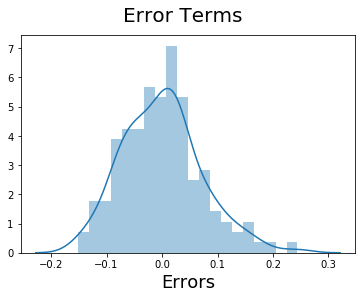

In [47]:
# plotting the residual graph
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins=20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize=18)

**Errors are normally distributed**

### Making Predictions

In [48]:
# transform the test data
df_test[num_columns] = scaler.transform(df_test[num_columns])

In [49]:
df_test.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,0.556580,0.544314,0.209375,0.248858,...,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645
std,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,0.228484,0.160738,0.273690,0.163376,...,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512
min,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,-0.111111,-0.060606,0.000000,0.016667,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,0.404762,0.484848,0.093750,0.107292,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.387931,0.547967,0.441667,0.588496,0.406129,0.226415,0.563492,0.585859,0.125000,0.218750,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.570690,0.719919,0.516667,0.699115,0.564876,0.316038,0.746032,0.641414,0.150000,0.295833,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.182759,1.089431,0.975000,1.061947,0.935609,0.932075,0.888889,0.863636,1.000000,0.662500,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
# Diving X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [51]:
X_test = X_test[col]
X_test = sm.add_constant(X_test)

In [52]:
# predict for test data
y_pred = lm.predict(X_test)

## Model Prediction


In [53]:
# import libraries for calculating r-sqaure and mean squared error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [54]:
# checking RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

0.07294299386782738

**Root Mean Square Error is : 0.73**

In [55]:
# checking R-squared on test
r2_score(y_test, y_pred)

0.9004517106020922

**For training data R-sqaured was 0.89 and for testd data R-square is 0.90 They are very close so the model seems to be very good fit.**

Lets plot graph between actual and predictes values

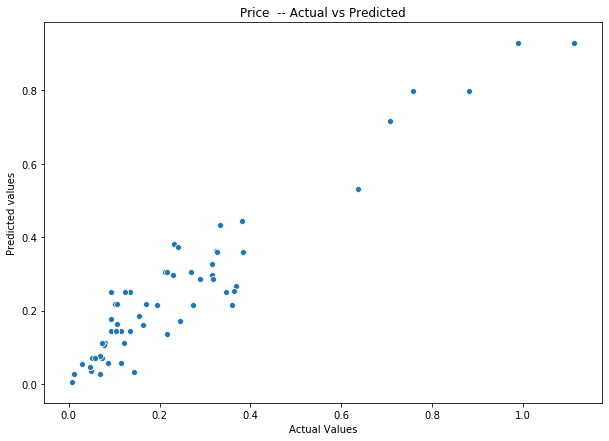

In [56]:
# graph between actual and predictes values 
plt.figure(figsize = (10,7))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.title('Price  -- Actual vs Predicted')
plt.show()

## Final Linear Regression Model Equation

In [57]:
# generate the linear regression equation
values = []
for x in lm.params.index:
    if(x == 'const'):
        values.append(f'{round(lm.params[x], 4)}')
    else:
        values.append(f'{round(lm.params[x], 4)} * {x}')
'price = ' +' + '.join(values)

'price = -0.187 + 0.4606 * carwidth + 0.7278 * enginesize + 0.44 * enginelocation_rear + 0.1664 * cylindernumber_two + 0.2447 * Company_bmw'

**price =-0.187 + 0.4606 * carwidth + 0.7278 * enginesize + 0.44 * enginelocation_rear + 0.1664 * cylindernumber_two + 0.2447 * Company_bmw**

## Interpretation

Following features have impact on the car price
<ol>
    <li>
        Car width -> Price Increases with more width
    </li>
    <li>
        Engine Size -> Price Increases with more engine size
    </li>
    <li>
        Rear Engine location -> Price Increases if engine is in rear
    </li>
    <li>
        2 Cylinder -> Price Increases with there are 2 cylinder in car
    </li>
    <li>
        BMW -> Price Increases with car company is bmw
    </li>
</ol>